In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot plt

#### Reading  dataset

In [6]:
df=pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [8]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [15]:
df.shape

(1067, 13)

In [16]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

### Let us divide the data set into training and testing datasets

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.loc[:,df.columns!='CO2EMISSIONS'],df['CO2EMISSIONS'])
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 12)
(267, 12)
(800,)
(267,)


In [97]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [120]:
x_train.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
dtype: object

In [122]:
x=np.asanyarray(x_train[['ENGINESIZE']])
y=np.asanyarray(y_train)
reg.fit(x,y)
X = np.asanyarray(x_test['ENGINESIZE'])
X=X.reshape(-1,1)
ypre = reg.predict(X)
ypre

array([269.97763872, 186.52373908, 186.52373908, 222.28969606,
       281.89962438, 186.52373908, 266.00364349, 222.28969606,
       262.02964827, 242.15967217, 381.2495049 , 202.41971996,
       266.00364349, 194.47172952, 194.47172952, 218.31570084,
       186.52373908, 186.52373908, 321.63957659, 262.02964827,
       262.02964827, 202.41971996, 333.56156225, 194.47172952,
       262.02964827, 250.10766261, 297.79560526, 266.00364349,
       202.41971996, 289.84761482, 186.52373908, 269.97763872,
       321.63957659, 242.15967217, 357.40553358, 242.15967217,
       202.41971996, 202.41971996, 194.47172952, 222.28969606,
       266.00364349, 202.41971996, 242.15967217, 222.28969606,
       345.48354791, 202.41971996, 262.02964827, 456.7554141 ,
       202.41971996, 293.82161004, 266.00364349, 349.45754313,
       258.05565305, 250.10766261, 341.50955269, 186.52373908,
       341.50955269, 266.00364349, 202.41971996, 273.95163394,
       262.02964827, 266.00364349, 321.63957659, 333.56

In [73]:
cof=reg.coef_[0]
inter=reg.intercept_

In [64]:
print("mean squared Error ",np.mean(abs(ypre-y_test)**2))

mean squared Error  910.8294946207969


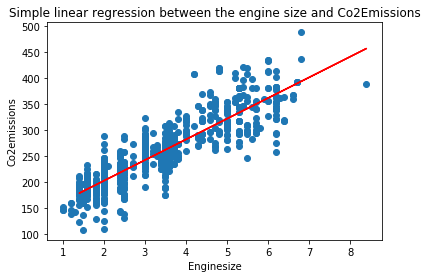

In [106]:
plt.scatter(x_train['ENGINESIZE'],y_train)
plt.plot(X,cof*X+inter,'r')
plt.xlabel("Enginesize")
plt.ylabel("Co2emissions")
plt.title("Simple linear regression between the engine size and Co2Emissions")
plt.show()

#### Let us use Multiple Linear Regression to predict co2emissions

In [128]:
x_m = np.asanyarray(x_train[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB"]])
x_mt = np.asanyarray(x_test[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB"]])
regm = linear_model.LinearRegression()
regm.fit(x_m,y)
y_hatm = regm.predict(x_mt)
print(regm.coef_)
print(regm.intercept_)

[16.84967356 -3.35037536]
70.88653949163171


In [126]:
print("please enter the engine_size of your car:")
x1=float(input())
x1=np.asanyarray(x1)
x1=x1.reshape(-1,1)
print("predicted co2emission",reg.predict(x1)[0])

please enter the engine_size of your car:
4
predicted co2emission 281.8996243783266
